In [37]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data
from sklearn.linear_model import LinearRegression
import yfinance as yf
%matplotlib inline
plt.style.use('seaborn-darkgrid')

#### 1. Peter Fu Chen
#### 2. Section: 003
#### 3. Research question: Can models actually predict short-term asset price movement? 

#### 4. Links to any resources

https://pypi.org/project/pyfinance/
Pyfinance is a python package mainly designed for securities investment management and performance evaluation indicators. In this project, I will use pyfinance to extract the historical price data of assets and a series of other data and integrate them into pandas Dataframe for data analysis.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
For one of model I will test is the LinearRegression. I will use sklearn.linear_model for its model to test our data.

https://towardsdatascience.com/how-to-create-a-monte-carlo-simulation-using-python-c24634a0978a
Another model I will use Monte Carlo for simple machine learning to run the model for over 10,000 times to predict the asset price.

In [38]:
# For the asset prices data, I will conduct a study on the top 5 holdings in S&P 500. 
# Date will be 2018/01/01 to 2019/01/01 to avoid the Covid-19 financial crisis largely deviating the fundamental price.

aapl = yf.download('AAPL', '2018-01-01', '2019-01-01', auto_adjust=True)

# For pyfinance's data: it's read as pandas Dataframe
print(type(aapl))

display(aapl)

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,40.518392,41.027967,40.304082,41.018440,102223600
2018-01-03,41.082720,41.563722,40.946994,41.011284,118071600
2018-01-04,41.085106,41.306559,40.975573,41.201786,89738400
2018-01-05,41.299406,41.758975,41.206540,41.670872,94640000
2018-01-08,41.516090,41.816119,41.416077,41.516090,82271200
...,...,...,...,...,...
2018-12-24,35.806988,36.628750,35.429945,35.487953,148676800
2018-12-26,35.843253,38.001581,35.461376,37.987080,234330000
2018-12-27,37.665615,37.890392,36.271042,37.740540,212468400


<class 'pandas.core.frame.DataFrame'>


,Close
Date,
2018-01-02,41.018440
2018-01-03,41.011284
2018-01-04,41.201786
2018-01-05,41.670872
2018-01-08,41.516090
...,...
2018-12-24,35.487953
2018-12-26,37.987080
2018-12-27,37.740540


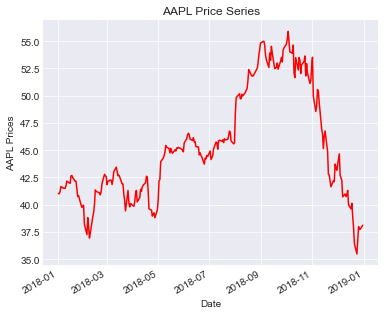

In [39]:
# We will only focus on the "Close" price

aaplclose = aapl[["Close"]]
print(type(aaplclose))
display(aaplclose)

aaplclose = aaplclose.dropna()
 
aaplclose.Close.plot(figsize=(6, 5),color='r')
plt.ylabel("AAPL Prices");
plt.title("AAPL Price Series");

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,81.338497,81.508484,80.743547,81.168510,22483800
2018-01-03,81.272366,81.697337,81.187377,81.546234,26061400
2018-01-04,81.772894,82.783375,81.754009,82.263969,21912000
2018-01-05,82.783383,83.491660,82.566175,83.283897,23407100
2018-01-08,83.293338,83.652202,82.726718,83.368889,22113000
...,...,...,...,...,...
2018-12-24,93.842837,94.121446,90.288187,90.432289,43935200
2018-12-26,91.402618,96.734601,90.268972,96.609703,51634800
2018-12-27,95.399207,97.214962,92.613126,97.205353,49498500


<class 'pandas.core.frame.DataFrame'>


,Close
Date,
2018-01-02,81.168510
2018-01-03,81.546234
2018-01-04,82.263969
2018-01-05,83.283897
2018-01-08,83.368889
...,...
2018-12-24,90.432289
2018-12-26,96.609703
2018-12-27,97.205353


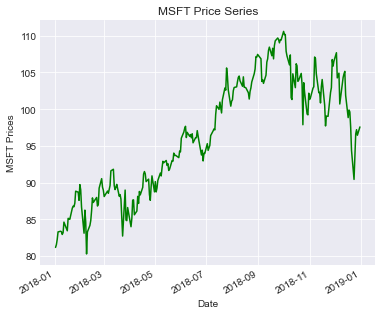

In [40]:
# We will do the same thing for other assets.
msft = yf.download('MSFT', '2018-01-01', '2019-01-01', auto_adjust=True)
display(msft)

msftclose = msft[["Close"]]
print(type(msftclose))
display(msftclose)

msftclose = msftclose.dropna()
 
msftclose.Close.plot(figsize=(6, 5),color='g')
plt.ylabel("MSFT Prices");
plt.title("MSFT Price Series");

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,85590000
...,...,...,...,...,...
2018-12-24,67.300003,69.801498,65.349998,67.197998,144400000
2018-12-26,68.444504,73.657997,68.150497,73.544998,208236000
2018-12-27,72.709999,73.449997,69.515503,73.082001,194440000


<class 'pandas.core.frame.DataFrame'>


,Close
Date,
2018-01-02,59.450500
2018-01-03,60.209999
2018-01-04,60.479500
2018-01-05,61.457001
2018-01-08,62.343498
...,...
2018-12-24,67.197998
2018-12-26,73.544998
2018-12-27,73.082001


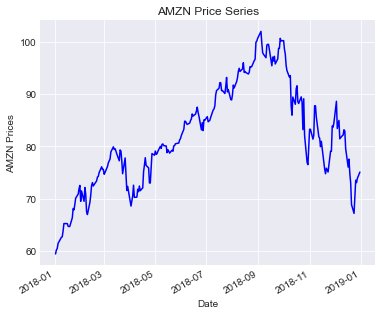

In [41]:
# We will do the same thing for other assets.
amzn = yf.download('AMZN', '2018-01-01', '2019-01-01', auto_adjust=True)
display(amzn)

amznclose = amzn[["Close"]]
print(type(amznclose))
display(amznclose)

amznclose = amznclose.dropna()
 
amznclose.Close.plot(figsize=(6, 5),color='b')
plt.ylabel("AMZN Prices");
plt.title("AMZN Price Series");

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,147891000
...,...,...,...,...,...
2018-12-24,20.900000,20.966667,19.680000,19.692667,83398500
2018-12-26,20.000000,21.798000,19.606001,21.739332,122446500
2018-12-27,21.322666,21.478001,20.100000,21.075333,128626500


<class 'pandas.core.frame.DataFrame'>


,Close
Date,
2018-01-02,21.368668
2018-01-03,21.150000
2018-01-04,20.974667
2018-01-05,21.105333
2018-01-08,22.427334
...,...
2018-12-24,19.692667
2018-12-26,21.739332
2018-12-27,21.075333


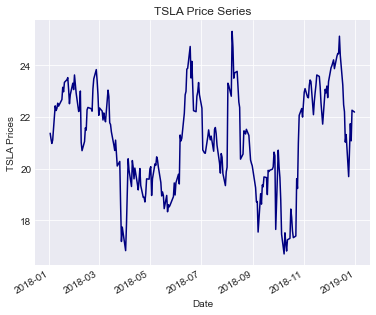

In [42]:
tsla = yf.download('TSLA', '2018-01-01', '2019-01-01', auto_adjust=True)
display(tsla)

tslaclose = tsla[["Close"]]
print(type(tslaclose))
display(tslaclose)

tslaclose = tslaclose.dropna()
 
tslaclose.Close.plot(figsize=(6, 5),color='navy')
plt.ylabel("TSLA Prices");
plt.title("TSLA Price Series");

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,198.869995,198.869995,195.960007,197.220001,4113000
2018-01-03,197.000000,200.000000,197.000000,199.789993,3526700
2018-01-04,200.899994,202.130005,200.009995,200.690002,3900000
2018-01-05,201.000000,201.669998,199.309998,201.419998,4207600
2018-01-08,201.149994,203.070007,199.800003,202.740005,3887900
...,...,...,...,...,...
2018-12-24,190.699997,191.639999,187.110001,187.759995,5020600
2018-12-26,188.649994,197.929993,186.100006,197.570007,7158200
2018-12-27,195.600006,200.119995,191.899994,200.119995,7386800


<class 'pandas.core.frame.DataFrame'>


,Close
Date,
2018-01-02,197.220001
2018-01-03,199.789993
2018-01-04,200.690002
2018-01-05,201.419998
2018-01-08,202.740005
...,...
2018-12-24,187.759995
2018-12-26,197.570007
2018-12-27,200.119995


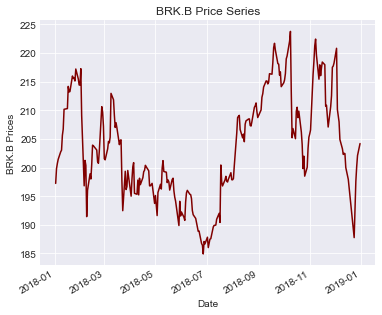

In [43]:
brkb = yf.download('BRK-B', '2018-01-01', '2019-01-01', auto_adjust=True)
display(brkb)

brkbclose = brkb[["Close"]]
print(type(brkbclose))
display(brkbclose)

brkbclose = brkbclose.dropna()
 
brkbclose.Close.plot(figsize=(6, 5),color='maroon')
plt.ylabel("BRK.B Prices");
plt.title("BRK.B Price Series");

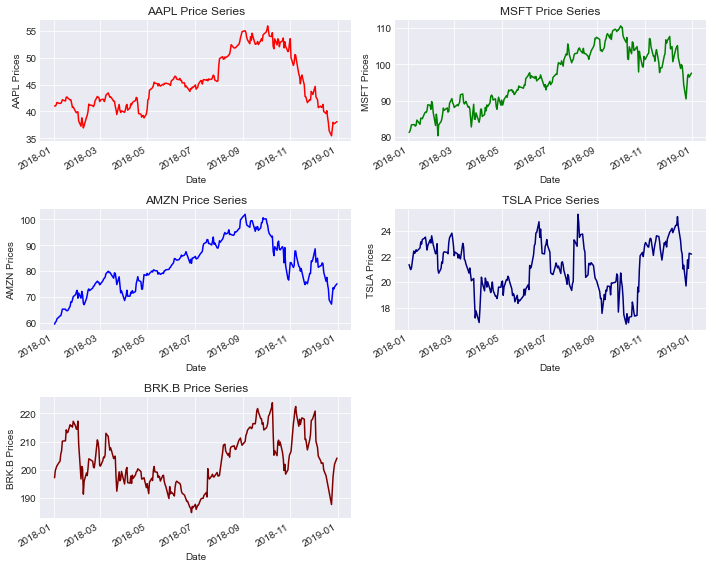

In [46]:
plt.figure(figsize=(10,8))

plt.subplot(3,2,1)
aaplclose.Close.plot(color='r')
plt.ylabel("AAPL Prices")
plt.title("AAPL Price Series")

plt.subplot(3,2,2)
msftclose.Close.plot(color='g')
plt.ylabel("MSFT Prices")
plt.title("MSFT Price Series")

plt.subplot(3,2,3)
amznclose.Close.plot(color='b')
plt.ylabel("AMZN Prices")
plt.title("AMZN Price Series")

plt.subplot(3,2,4)
tslaclose.Close.plot(color='navy')
plt.ylabel("TSLA Prices")
plt.title("TSLA Price Series")

plt.subplot(3,2,5)
brkbclose.Close.plot(color='maroon')
plt.ylabel("BRK.B Prices")
plt.title("BRK.B Price Series")


plt.tight_layout()

Ok, we have all our data. Good news is they are all in the same shape and the dataFrame is all cleaned.
We can further do analyze the data.